# Descarga de datos

In [3]:
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

url_red = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

os.makedirs('../data/raw', exist_ok=True)
os.makedirs('../data/processed', exist_ok=True)

with open('../data/raw/winequality-red.csv', 'wb') as red:
    red.write(requests.get(url_red).content)
with open('../data/raw/winequality-white.csv', 'wb') as white:
    white.write(requests.get(url_white).content)

# Combinar los datos

In [5]:

red_df = pd.read_csv('../data/raw/winequality-red.csv', sep=';')
white_df = pd.read_csv('../data/raw/winequality-white.csv', sep=';')

red_df['type'] = 'red'
white_df['type'] = 'white'

wines_df = pd.concat([red_df, white_df], ignore_index=True)
wines_df.to_csv('../data/processed/wines.csv', index=False)

### Conteo de Registros y variables

In [6]:
print(wines_df.info())
print(wines_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None
(6497, 13)


In [7]:
var_type = wines_df.dtypes.value_counts()
print(f'Observamos que tenemos {wines_df.shape[0]} registros, con {wines_df.isnull().sum().sum()} valores nulos y {wines_df.shape[1]} variables')
print(f'El tipo de variables es: \n\n{var_type}')

Observamos que tenemos 6497 registros, con 0 valores nulos y 13 variables
El tipo de variables es: 

float64    11
int64       1
object      1
Name: count, dtype: int64


## Filtrar Atípicos y Manejar Datos Ausentes

A continuación, realizaremos un estudio de los datos con el objetivo de obtener conclusiones sobre las variables que influyen en la obtención de un vino de alta calidad, en contraposición a aquellas que resultan en vinos de calidad inferior.

In [8]:
wines_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Filtrar Datos Ausentes

In [9]:
# Crear una copia para filtrar valores atípicos y nulos
df_wines_copy = wines_df.copy()
df_wines_copy.columns = df_wines_copy.columns.str.replace(' ', '_')
df_wines_copy.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
df_wines_copy['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [11]:
print(df_wines_copy.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


In [12]:
# Comentamos la siguiente línea al no tener valores nulos

# df_wines_copy.dropna(inplace=True)

### Filtrar Valores Atípicos

In [13]:
# Lista de columnas numéricas a analizar (en este caso todas las que aparecen en describe)
columnas_numericas = df_wines_copy.select_dtypes(include=['float64', 'int64']).columns

In [14]:
# Calcular la matriz de correlación para todos los tipos de vinos
corr_matrix = df_wines_copy[columnas_numericas].corr()

In [15]:
# Calcular la matriz de correlación para todos los vinos blancos

corr_matrix_white = df_wines_copy[df_wines_copy['type'] == 'white'][columnas_numericas].corr()

In [16]:
# Calcular la matriz de correlación para todos los vinos tintos

corr_matrix_red = df_wines_copy[df_wines_copy['type'] == 'red'][columnas_numericas].corr()

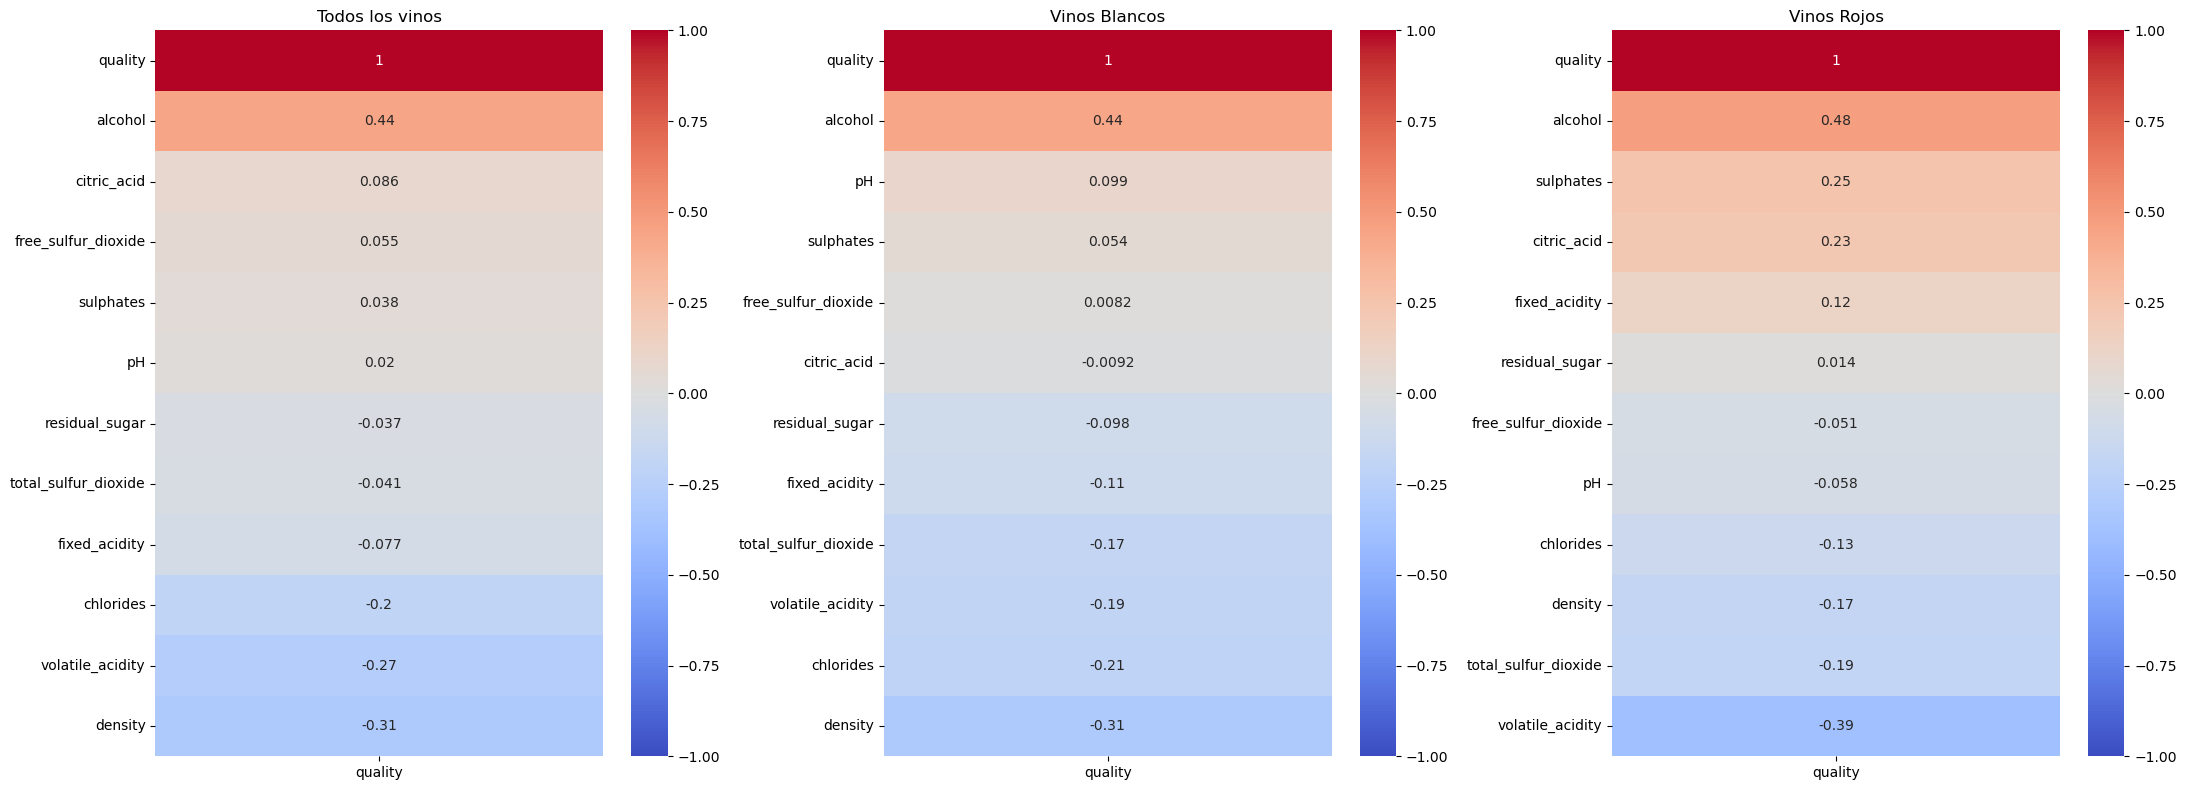

In [17]:
# Visualizar la correlación entre cada variable y la calidad del vino entre todos los vinos, rojos y blancos

fig, axes = plt.subplots(1, 3, figsize=(22, 8))

sns.heatmap(corr_matrix[['quality']].sort_values(by='quality', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('Todos los vinos')

sns.heatmap(corr_matrix_white[['quality']].sort_values(by='quality', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title('Vinos Blancos')

sns.heatmap(corr_matrix_red[['quality']].sort_values(by='quality', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[2])
axes[2].set_title('Vinos Rojos')

plt.tight_layout()
plt.show()


## Definir un umbral para las correlaciones negativas e Identificacion de las variables que afectan negativamente a la calidad del vino por separado.